<a href="https://colab.research.google.com/github/Nandan0402/AI-ML-Projects-Getskilled/blob/main/Mobile_Price_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Mobile Price Prediction***

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

In [15]:
data=pd.read_csv("train.csv")

In [16]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,0,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,1,2
3,615,1,2.5,0,0,1,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,1,1,3
4,1821,0,1.2,1,13,1,44,0.6,141,2,...,1208,1212,1411,8,1,15,0,0,0,1
5,1859,1,2.8,1,3,1,22,0.5,164,4,...,1004,1654,1067,17,4,10,1,1,1,2
6,1289,0,1.8,0,5,0,16,0.7,156,8,...,1366,720,3000,15,6,14,0,1,1,3
7,1500,1,2.0,1,8,1,32,0.6,170,6,...,1440,2560,3500,18,9,20,1,1,1,3
8,900,0,1.0,0,2,0,8,0.8,180,4,...,800,600,1200,10,5,8,0,0,0,0
9,1700,1,2.4,1,12,1,64,0.5,155,8,...,1920,2400,4096,19,10,18,1,1,1,3


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  10 non-null     int64  
 1   blue           10 non-null     int64  
 2   clock_speed    10 non-null     float64
 3   dual_sim       10 non-null     int64  
 4   fc             10 non-null     int64  
 5   four_g         10 non-null     int64  
 6   int_memory     10 non-null     int64  
 7   m_dep          10 non-null     float64
 8   mobile_wt      10 non-null     int64  
 9   n_cores        10 non-null     int64  
 10  pc             10 non-null     int64  
 11  px_height      10 non-null     int64  
 12  px_width       10 non-null     int64  
 13  ram            10 non-null     int64  
 14  sc_h           10 non-null     int64  
 15  sc_w           10 non-null     int64  
 16  talk_time      10 non-null     int64  
 17  three_g        10 non-null     int64  
 18  touch_screen 

# ***Visualizing Corrections***

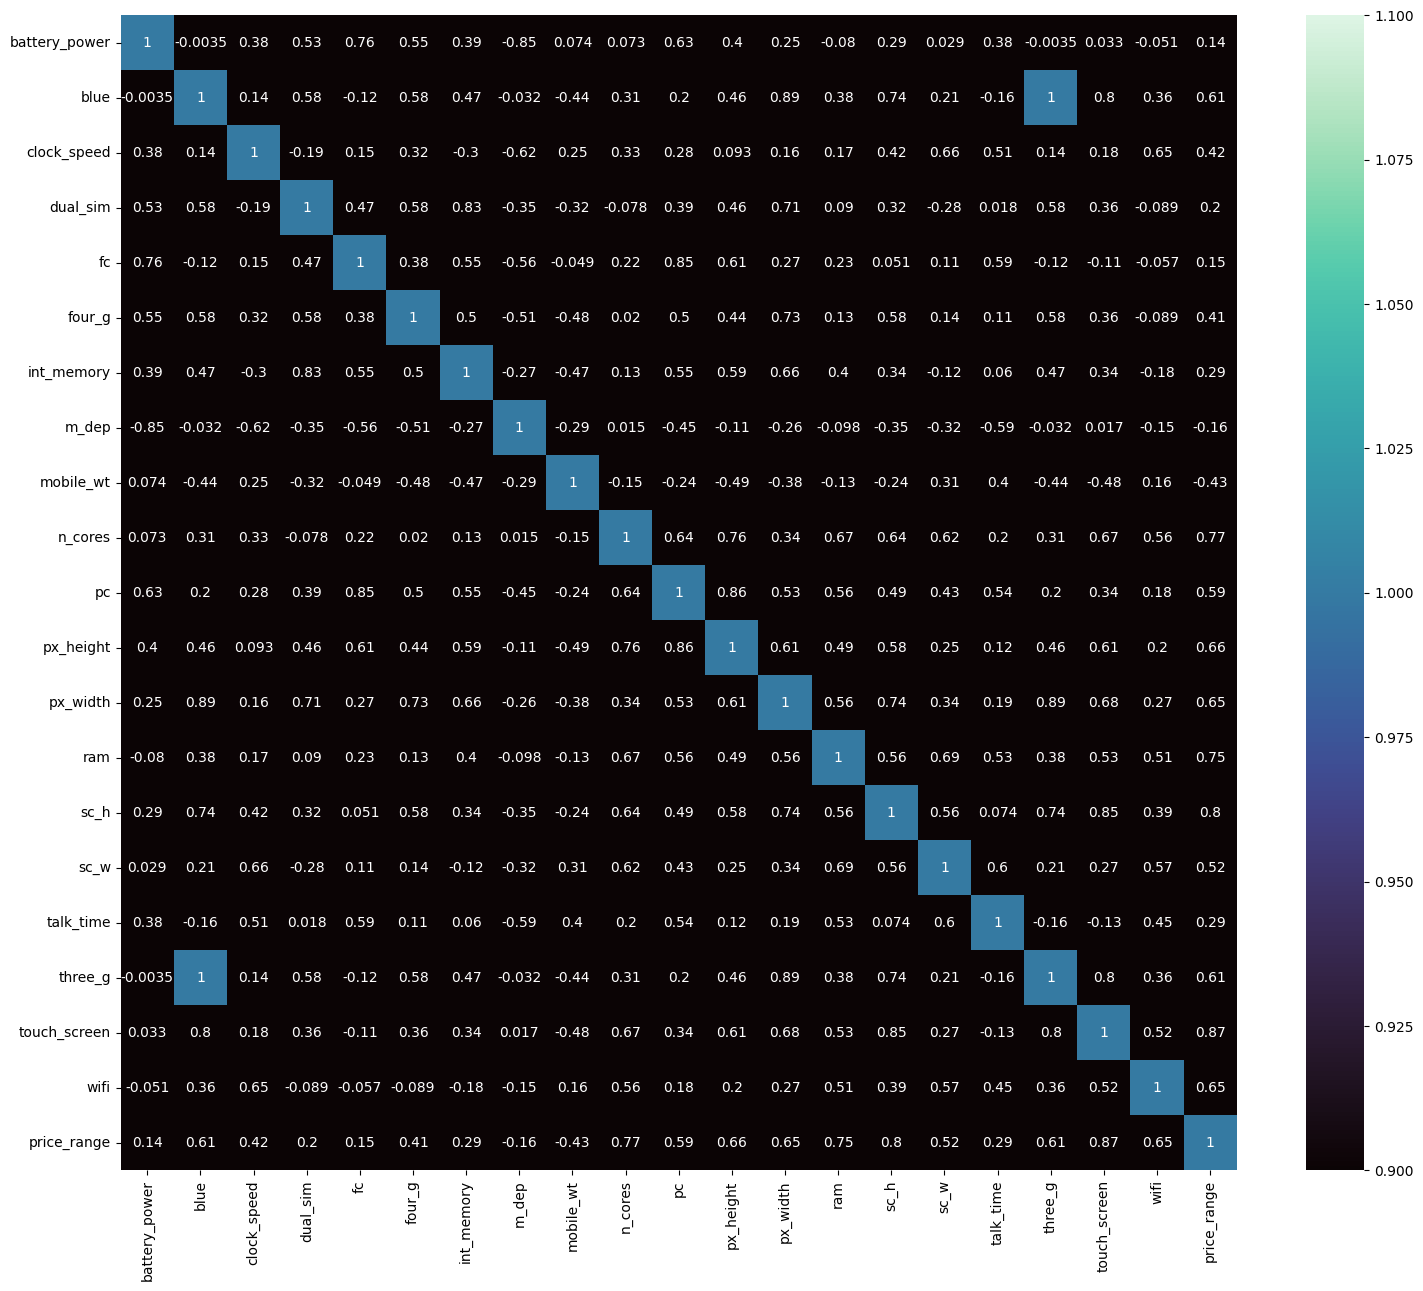

In [18]:
corr = data.corr()
plt.figure(figsize=(18,15))
sns.heatmap(corr, annot=True , vmin=1.0 , cmap='mako')
plt.show()

In [19]:
y = data['price_range'].copy()
X = data.drop('price_range',axis=1).copy()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=20)

# ***Buliding Pipeline***

In [24]:
pipe = Pipeline([('scalar', StandardScaler()),('logistic_regression',LogisticRegression())])

In [25]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()),
                ('logistic_regression', LogisticRegression())])

## ***Results***

In [27]:
print("Accuarcy",pipe.score(X_test,y_test))

Accuarcy 0.42857142857142855


# ***Trying without Ram Features***

In [28]:
data = data.drop('ram',axis=1)

y = data['price_range'].copy()
X = data.drop('price_range',axis=1).copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=20)

pipe.fit(X_train,y_train)

print("Accuracy:",pipe.score(X_test,y_test))

Accuracy: 0.42857142857142855
